In [ ]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
np.random.seed(seed=23)

# Estimating the Impact of Advertisement on User Engagement in a Food Delivery App



This experiment has three primary objectives:

Practice simulating data-generating processes (DGPs) that mimic real-world scenarios in a food delivery app environment.

Apply the Simple Difference in Outcomes methodology to assess causal effects.
Illustrate how randomized experiments can provide unbiased estimates of the Average Treatment Effect (ATE).

Context: Imagine a scenario in which a food delivery app (similar to Uber Eats or DoorDash) features a restaurant advertisement prominently on its home page. This display ad, intended to drive sales, showcases a restaurant's image with a direct link, and select restaurants pay a premium to appear in this featured spot. The app's algorithm favors displaying certain ads based on the user's location and past purchase behavior, prioritizing restaurants closer to the user or those they frequent often.

I simulate a long-term ad campaign for one restaurant, aiming to evaluate the advertisement's impact on user engagement. The restaurant wishes to understand the ad's effect on their sales and determine if continued investment in the ad is beneficial. The experiment spans over the duration of the campaign, during which we collect user interaction data to measure the ad’s effectiveness.

In [ ]:

n = 1000

data_dict= {}

data_dict["consumer_ID"] = pd.Series ([ i for i in range(0,n)])

df = pd.DataFrame(data_dict)

df["distance"] = np.random.uniform (low=0, high=20, size= n)

df["past_spend"] = np.random.uniform(low=30,high=70, size= n)

In [ ]:

df['see_ad']= np.where(((df["distance"] <= 10) & (df["past_spend"] > 50)), 1, 0)
df.head()

,consumer_ID,distance,past_spend,see_ad
0,0,10.345958,68.519478,0
1,1,18.939252,63.201972,0
2,2,15.309195,32.915813,0
3,3,5.647917,42.874291,0
4,4,4.420907,68.124028,1


In [ ]:
df['Y0'] = df['past_spend'] + np.random.normal(0, 5, size=n)
df['Y1'] = df['Y0'] + np.where(df['distance'] > 10, np.random.normal(10, 2, size=n), np.random.normal(20, 4, size=n))

In [ ]:
df['Y'] = df['Y1'] * df['see_ad'] + df['Y0'] * (1 - df['see_ad'])

In [ ]:
df.head()

,consumer_ID,distance,past_spend,see_ad,Y0,Y1,Y
0,0,10.345958,68.519478,0,71.022013,79.847369,71.022013
1,1,18.939252,63.201972,0,60.202675,70.692913,60.202675
2,2,15.309195,32.915813,0,34.478649,45.815301,34.478649
3,3,5.647917,42.874291,0,46.489805,66.187577,46.489805
4,4,4.420907,68.124028,1,66.572340,88.730752,88.730752


Percentage that saw ad: 26.700000000000003%
Average Y0 (No ad): 50.06257285558593
Average Y1 (Saw ad): 65.34294926238458
Average Y (Observed): 55.33973835597391


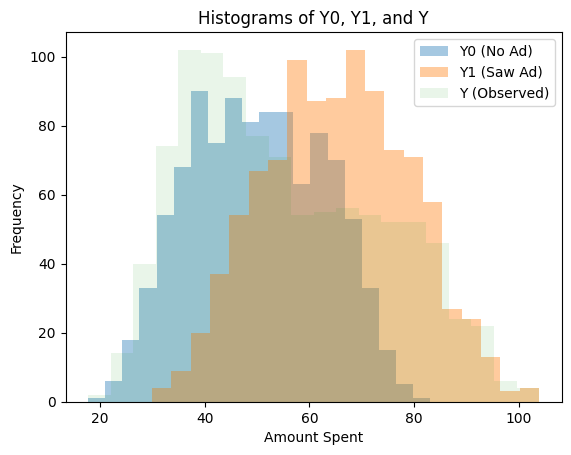

In [ ]:
perc_saw_ad = df['see_ad'].mean() * 100
avg_Y0 = df['Y0'].mean()
avg_Y1 = df['Y1'].mean()
avg_Y = df['Y'].mean()

print(f"Percentage that saw ad: {perc_saw_ad}%")
print(f"Average Y0 (No ad): {avg_Y0}")
print(f"Average Y1 (Saw ad): {avg_Y1}")
print(f"Average Y (Observed): {avg_Y}")


plt.hist(df['Y0'], bins=20, alpha=0.4, label="Y0 (No Ad)")
plt.hist(df['Y1'], bins=20, alpha=0.4, label="Y1 (Saw Ad)")
plt.hist(df['Y'], bins=20, alpha=0.1, label="Y (Observed)")

plt.title("Histograms of Y0, Y1, and Y")
plt.xlabel("Amount Spent")
plt.ylabel("Frequency")
plt.legend()
plt.show()

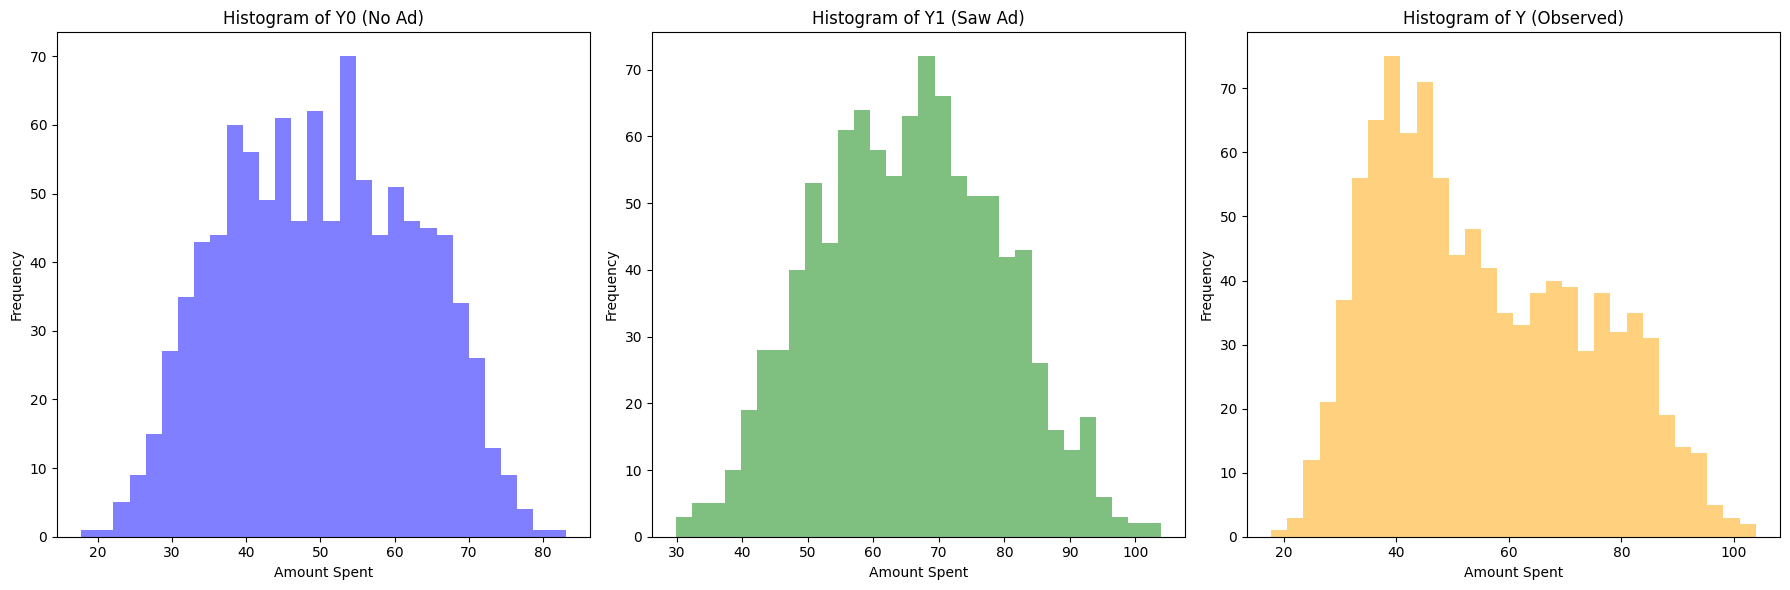

In [ ]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.hist(df["Y0"], bins=30, alpha=0.5, color='blue')
plt.title("Histogram of Y0 (No Ad)")
plt.xlabel("Amount Spent")
plt.ylabel("Frequency")

plt.subplot(1, 3, 2)
plt.hist(df["Y1"], bins=30, alpha=0.5, color='green')
plt.title("Histogram of Y1 (Saw Ad)")
plt.xlabel("Amount Spent")
plt.ylabel("Frequency")

plt.subplot(1, 3, 3)
plt.hist(df["Y"], bins=30, alpha=0.5, color='orange')
plt.title("Histogram of Y (Observed)")
plt.xlabel("Amount Spent")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [ ]:
simple_diff = df[df['see_ad'] == 1]['Y'].mean() - df[df['see_ad'] == 0]['Y'].mean()

print(f"Simple Difference in Outcomes: {simple_diff}")

Simple Difference in Outcomes: 33.10056238514199


In [ ]:
avg_Y1_saw_ad = df[df['see_ad'] == 1]['Y1'].mean()
avg_Y1_did_not_see_ad = df[df['see_ad'] == 0]['Y1'].mean()

selection_bias1 = avg_Y1_saw_ad - avg_Y1_did_not_see_ad
print(f"Selection bias Y1: {selection_bias1}")

avg_Y0_saw_ad = df[df['see_ad'] == 1]['Y0'].mean()
avg_Y0_did_not_see_ad = df[df['see_ad'] == 0]['Y0'].mean()

selection_bias0 = avg_Y0_saw_ad - avg_Y0_did_not_see_ad
print(f"Selection bias Y0: {selection_bias0}")

Selection bias Y1: 19.45361708308107
Selection bias Y0: 13.335897589681394


There is selection bias because in this data generating process the target audience that the ad is shown to has already either shown interest in spending more money at the restuarant or they live close to visit frequently. This treatment is not randomly distributed so there is selection bias.

In [ ]:
treatment_effect_near = df[df['distance'] <= 10]['Y1'].mean() - df[df['distance'] <= 10]['Y0'].mean()
treatment_effect_far = df[df['distance'] > 10]['Y1'].mean() - df[df['distance'] > 10]['Y0'].mean()

print(f"Treatment effect for consumers within 10 miles: {treatment_effect_near}")
print(f"Treatment effect for consumers more than 10 miles away: {treatment_effect_far}")

heterogeneous_effect = treatment_effect_near - treatment_effect_far
print(f"Heterogeneous treatment effect: {heterogeneous_effect}")


Treatment effect for consumers within 10 miles: 19.92705590051621
Treatment effect for consumers more than 10 miles away: 9.803571164748078
Heterogeneous treatment effect: 10.12348473576813


There is a heterogeneous treatment effect because consumers respond differently to the ad based on their distance from the restaurant. Consumers who live closer (within 10 miles) find it easier and faster to order from the restaurant, so they are more responsive to the ad, spending significantly more when exposed to it. Meanwhile, consumers who live farther away (more than 10 miles) face longer delivery times and may order less frequently, making them less responsive to the ad.

In [ ]:
ATE = (df['Y1'] - df['Y0']).mean()

print(f"Average Treatment Effect (ATE): {ATE}")

Average Treatment Effect (ATE): 15.280376406798641


Consumers who see the ad are more likely to live closer to the restaurant or have spent more in the past, making them systematically different from those who didn’t see the ad. This non-random selection into the treatment group leads to a biased estimate, which is why the simple difference is not equal to the ATE.

In [ ]:
df['experiment_ad'] = np.random.choice([0, 1], size=n, p=[0.5, 0.5])
df.head()

,consumer_ID,distance,past_spend,see_ad,Y0,Y1,Y,experiment_ad
0,0,10.345958,68.519478,0,71.022013,79.847369,71.022013,0
1,1,18.939252,63.201972,0,60.202675,70.692913,60.202675,0
2,2,15.309195,32.915813,0,34.478649,45.815301,34.478649,1
3,3,5.647917,42.874291,0,46.489805,66.187577,46.489805,1
4,4,4.420907,68.124028,1,66.572340,88.730752,88.730752,1


In [ ]:
df['experiment_Y'] = df['Y1'] * df['experiment_ad'] + df['Y0'] * (1 - df['experiment_ad'])
df.head()

,consumer_ID,distance,past_spend,see_ad,Y0,Y1,Y,experiment_ad,experiment_Y
0,0,10.345958,68.519478,0,71.022013,79.847369,71.022013,0,71.022013
1,1,18.939252,63.201972,0,60.202675,70.692913,60.202675,0,60.202675
2,2,15.309195,32.915813,0,34.478649,45.815301,34.478649,1,45.815301
3,3,5.647917,42.874291,0,46.489805,66.187577,46.489805,1,66.187577
4,4,4.420907,68.124028,1,66.572340,88.730752,88.730752,1,88.730752


In [ ]:
simple_diff_experiment = df[df['experiment_ad'] == 1]['experiment_Y'].mean() - df[df['experiment_ad'] == 0]['experiment_Y'].mean()

print(f"Simple Difference in Outcomes: {simple_diff_experiment}")

Simple Difference in Outcomes: 14.751657318585039


Here the ad assignment was randomized, ie. 50% of consumers were randomly assigned to see the ad regardless of their proximity or spending history. Randomization removes the selection bias that was present in 2d, leading to a more accurate estimate of the causal effect of the ad, which is why the simple difference here is closer to the true ATE and lower than the biased result in 2d.

Mean Average Treatment Effect across simulations: 15.290249705575675


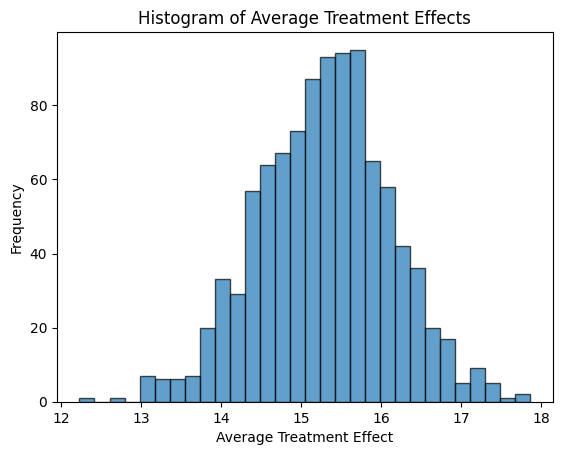

Range of Estimated Average Treatment Effects: (12.23040614277135, 17.864156086332123)


In [ ]:
num_simulations = 1000
ate_simulations = []

for _ in range(num_simulations):
    df['experiment_ad'] = np.random.choice([0, 1], size=n, p=[0.5, 0.5])

    df['experiment_Y'] = df['Y1'] * df['experiment_ad'] + df['Y0'] * (1 - df['experiment_ad'])

    simple_diff_experiment = df[df['experiment_ad'] == 1]['experiment_Y'].mean() - df[df['experiment_ad'] == 0]['experiment_Y'].mean()

    ate_simulations.append(simple_diff_experiment)

mean_ate = np.mean(ate_simulations)
print(f"Mean Average Treatment Effect across simulations: {mean_ate}")

plt.hist(ate_simulations, bins=30, edgecolor='k', alpha=0.7)
plt.title("Histogram of Average Treatment Effects")
plt.xlabel("Average Treatment Effect")
plt.ylabel("Frequency")
plt.show()

ate_range = (min(ate_simulations), max(ate_simulations))
print(f"Range of Estimated Average Treatment Effects: {ate_range}")

The histogram of the Average Treatment Effects from multiple simulated experiments shows the distribution of ATE estimates when the experiment is repeated under random assignment.
The mean of the ATE across all experiments closely approximates the true causal effect, meaning that over many runs, the experiment tends to reveal the correct average treatment effect.
The variance in the ATEs demonstrates that any single experiment can yield results that differ from the true effect due to random variation in the sample.